# MULTIPLE LINEAR REGRESSION

In [2]:
import pandas as pd
df=pd.read_csv(r"D:\Data Science\Assignments\MLR\ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


**Dataset Description:**
The dataset consists of the following variables:
- Age_08_04: Age in years
- KM: Accumulated Kilometers on odometer
- FuelType: Fuel Type (Petrol, Diesel, CNG)
- HP: Horse Power
- Automatic: Automatic ( (Yes=1, No=0)
- CC: Cylinder Volume in cubic centimeters
- Doors: Number of doors
- Cylinders: Number of cylinders
- Gears: Number of Gears
- Weight: Weight in Kilograms
- Price: its target variable


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
# We have 11 columns and 1436 rows in our data
# We have 10 integer (numerical) columns and one object (string) categorical column. 
# We can use bar chart to analyze price variation for the car

<BarContainer object of 1436 artists>

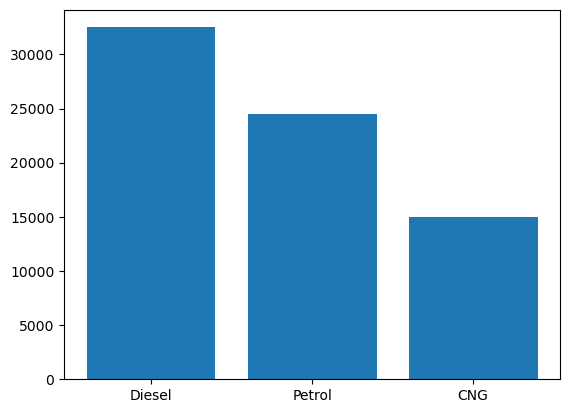

In [6]:
import matplotlib.pyplot as plt
plt.bar(df["Fuel_Type"],df["Price"])

In [7]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [8]:
# In our data, we have highest Petrol values count but still we are getting max Price for Diesel ones.

In [9]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [10]:
# Our dataset has no null values

In [11]:
df.nunique()

Price         236
Age_08_04      77
KM           1263
Fuel_Type       3
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
dtype: int64

In [12]:
# In our dataset there is only one unique value for Cylinders column

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>, <Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>],
       [<Axes: title={'center': 'cc'}>,
        <Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

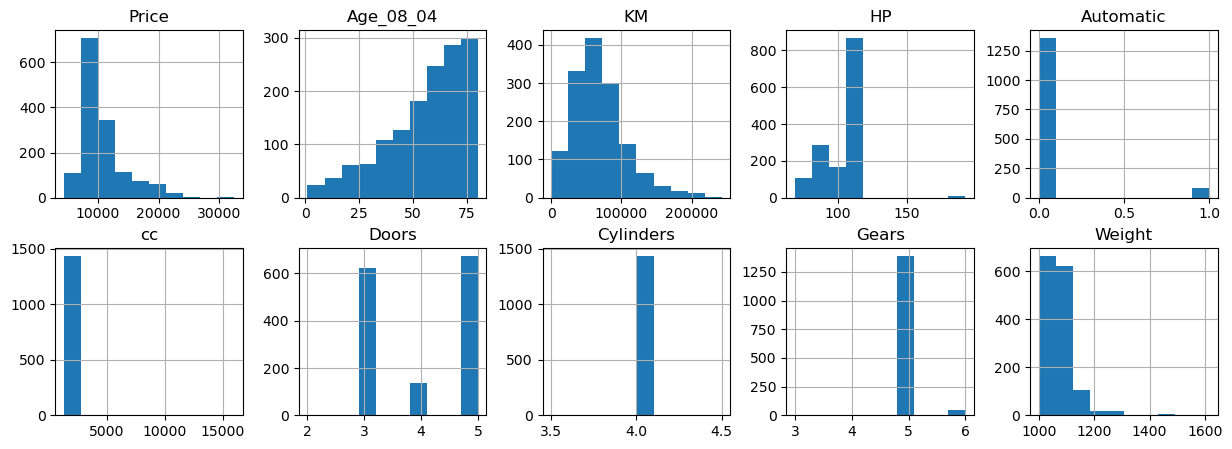

In [13]:
df.hist(layout=(2,5),figsize=(15,5))

In [14]:
# Since Cylinders column has only one value we don't need it in our Multiple Linear Regression model 

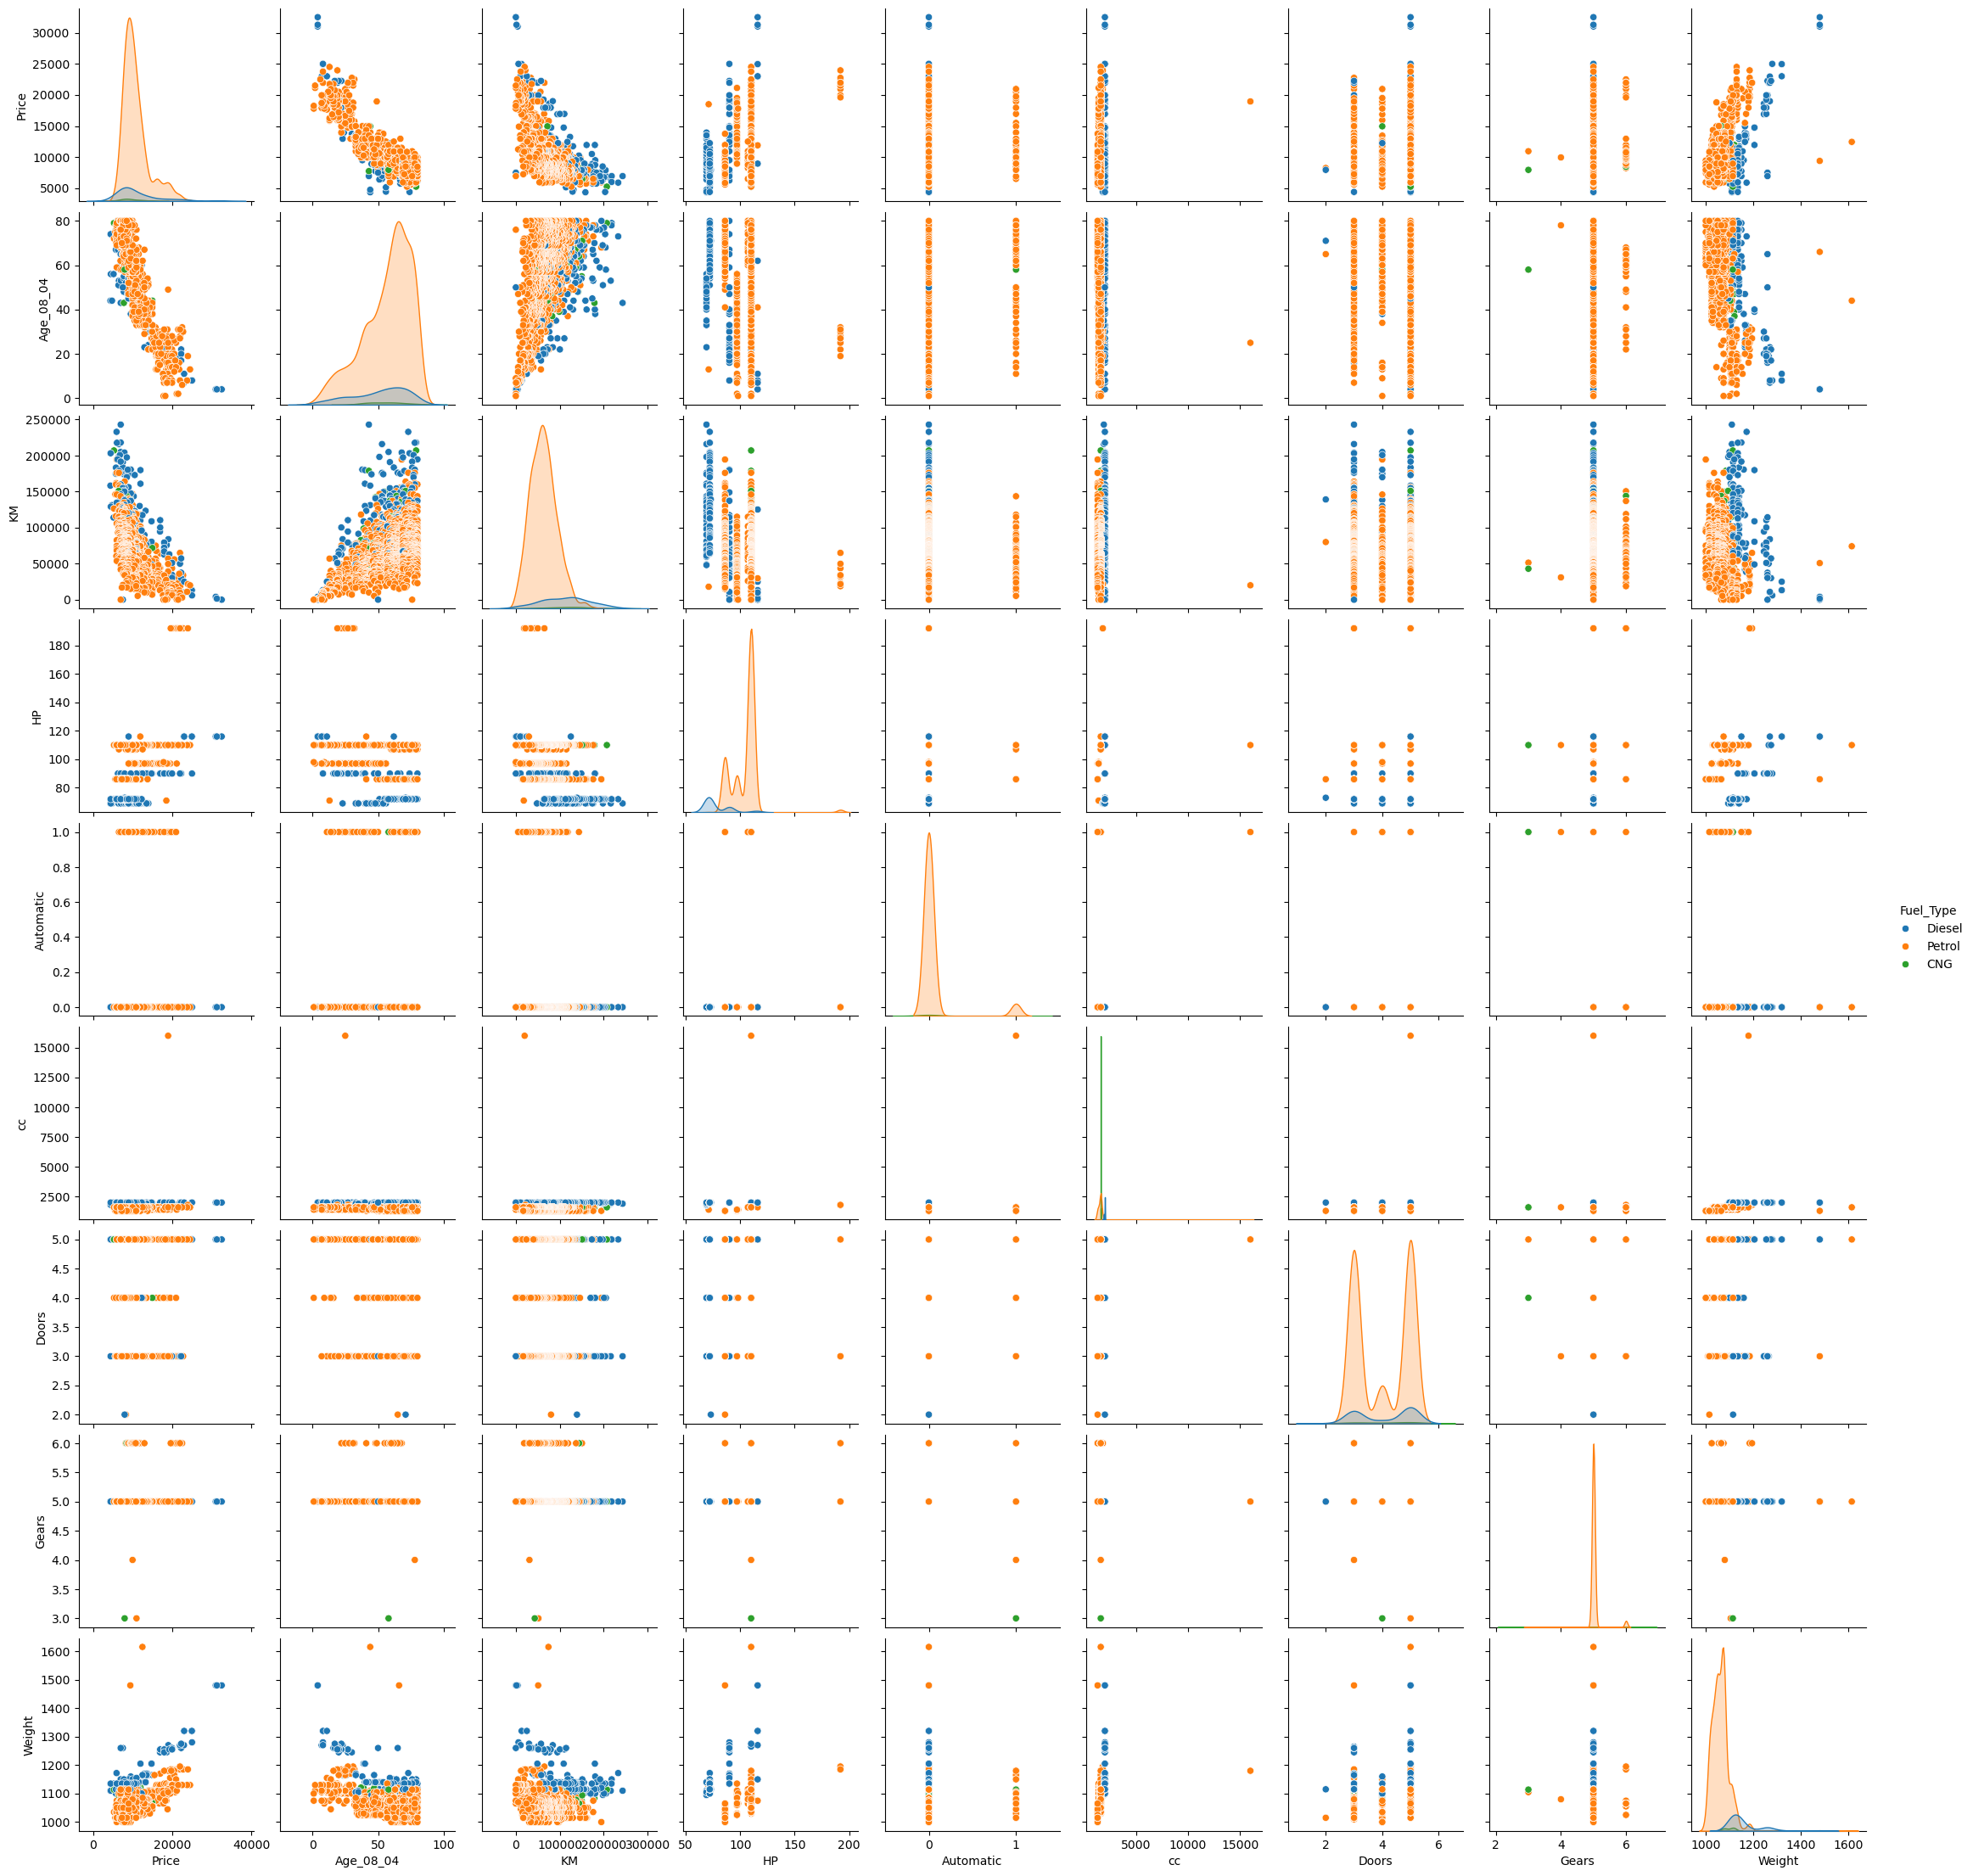

In [15]:
import seaborn as sns
df1=df.drop("Cylinders",axis=1)
sns.pairplot(df1,hue="Fuel_Type")

In [16]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [17]:
df.corr(numeric_only=True)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [18]:
# from the correlation table above it could be inferred that Cylinders column has no correlation, Age and KM has negative corr and 
# all other numerical variables also has some positive correlation
# Since Fuel_type is a categorical variable we will use one hot encoding to convert it to boolean value and then add it.
# Since Cylinders has no correlation we will not use that column in feature extraction

In [19]:
x=df[['Age_08_04', 'KM', 'HP', 'Automatic', 'cc','Doors','Gears', 'Weight']]

In [20]:
# For building 1st model taking all the value from Fuel_Type column

In [21]:
Fuel=pd.get_dummies(df["Fuel_Type"])

In [22]:
x=pd.concat([x,Fuel],axis=1)

In [23]:
y=df["Price"]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
x_train.shape

(1148, 11)

In [26]:
x_test.shape

(288, 11)

In [27]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=model1.predict(x_test)
y_pred

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [29]:
from sklearn.metrics import r2_score,mean_squared_error
print(f"Coefficients of determination for model1 is {r2_score(y_test,y_pred)}")

Coefficients of determination for model1 is 0.8348888040611083


In [30]:
print(f"Mean Squared error for model1 is {mean_squared_error(y_test,y_pred)}")

Mean Squared error for model1 is 2203043.8231437015


In [31]:
# Using Lasso regression
lasso=Lasso(alpha=50)
#alpha=penalization factor-controls coefficient of linear Regression model
lasso.fit(x_train,y_train)

Lasso(alpha=50)

In [32]:
lasso_y_pred=lasso.predict(x_test)
print(f"Coefficients of determination for model1 using lasso is {r2_score(y_test,lasso_y_pred)}")

Coefficients of determination for model1 using lasso is 0.8503236281818982


In [33]:
# When using Lasso we have higher accuracy by .02

In [34]:
# For building 2nd model taking one less value from Fuel_Type column to avoid multicolliniearity
# We can use pd.get_dummies() and add drop_first=True

In [35]:
x1=df[['Age_08_04', 'KM', 'HP', 'Automatic', 'cc','Doors','Gears', 'Weight']]

In [36]:
Fuel=pd.get_dummies(df["Fuel_Type"],drop_first=True)
Fuel.value_counts()

Diesel  Petrol
False   True      1264
True    False      155
False   False       17
Name: count, dtype: int64

In [37]:
x1=pd.concat([x1,Fuel],axis=1)

In [38]:
y1=df["Price"]

In [39]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=4)

In [40]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape


((1148, 10), (288, 10), (1148,), (288,))

In [41]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x1_train,y1_train)

LinearRegression()

In [42]:
y1_pred=model2.predict(x1_test)
y1_pred

array([ 7966.8604859 ,  9981.68045749,  9663.63401672, 11773.24238642,
        8610.94543924,  8157.74373983, 14048.38685591,  9430.06455161,
        6959.8039277 , 10810.12737826,  8334.03081404,  8502.56243461,
        6493.20146333, 11145.09371747, 12824.78784573,  9565.5901751 ,
        9356.93953546,  7930.73905458, 11666.18973787, 12967.42100084,
        9221.33945266,  6509.16718182,  7709.8581325 ,  8286.54261467,
        8725.78833871, 13815.60551258,  7160.15733092, 15297.29265129,
       18610.62514616,  9956.96532198,  9459.24964513,  9111.41268967,
       13288.95359385, 19591.3244945 ,  9203.84324376, 17901.12802392,
        6934.93144866, 10771.78106664, 12971.76096223, 14400.8853816 ,
       17469.53610177, 14145.52157593,  6381.10069187, 10255.57187272,
       12009.4781485 , 18144.82255964, 10349.30825889, 13303.26351907,
        9565.0875838 ,  7997.0006004 , 12146.94836159, 18045.11635289,
        9284.66804438, 10079.78157957,  9354.65735713, 13450.39575784,
      

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
print(f"Coefficients of determination for model2 is {r2_score(y1_test,y1_pred)}")

Coefficients of determination for model2 is 0.869433896956013


In [44]:
print(f"Mean Squared error for model2 is {mean_squared_error(y1_test,y1_pred)}")

Mean Squared error for model2 is 2040772.1509166593


In [45]:
# Using Ridge regression
ridge=Ridge(alpha=50)
#alpha=penalization factor-controls coefficient of linear Regression model
ridge.fit(x1_train,y1_train)

Ridge(alpha=50)

In [46]:
ridge_y1_pred=ridge.predict(x1_test)
print(f"Coefficients of determination for model2 using lasso is {r2_score(y1_test,ridge_y1_pred)}")

Coefficients of determination for model2 using lasso is 0.8708814974710765


- What is Normalization & Standardization and how is it helpful?

  These are feature scaling techniques used to ensure that variables contribute equally to model performance, especially in algorithms sensitive to magnitude. 


- What techniques can be used to address multicollinearity in multiple linear regression?

  Fuel=pd.get_dummies(df["Fuel_Type"],drop_first=True) We can use "drop_first=True" to address multicollinearity.